In [3]:
import nltk

In [4]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\Student\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [6]:
messages = [line.rstrip()for line in open(r"D:\[FreeTutorials.Eu] Udemy - Python for Data Science and Machine Learning Bootcamp\3. Jupyter Overview\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection")]

In [8]:
print(len(messages))  

5574


In [9]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [10]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,messages)
    print("\n")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
import pandas as pd

In [14]:
message = pd.read_csv(r"D:\[FreeTutorials.Eu] Udemy - Python for Data Science and Machine Learning Bootcamp\3. Jupyter Overview\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection",sep="\t",names=["label","message"])

In [16]:
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
message.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
message.groupby("label").describe()


message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [21]:
message["length"]= message["message"].apply(len)

In [22]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


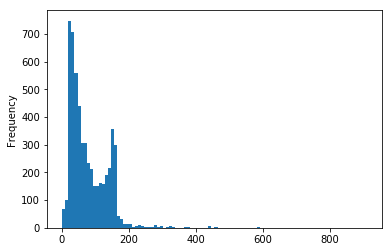

In [24]:
message["length"].plot.hist(bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000EE298AFF28>,
      dtype=object)

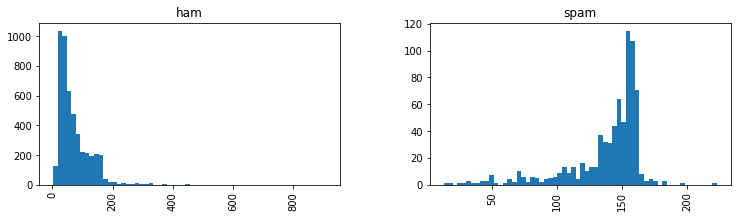

In [25]:
message.hist(column="length",by = "label",bins =60,figsize=(12,3))

In [50]:
import string

In [51]:
mess ="samplemessG! nOTIRCE I  HAS PONCTUTION "

In [52]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
nopunc = [c for c in mess if c not in string.punctuation]

In [54]:
nopunc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 'm',
 'e',
 's',
 's',
 'G',
 ' ',
 'n',
 'O',
 'T',
 'I',
 'R',
 'C',
 'E',
 ' ',
 'I',
 ' ',
 ' ',
 'H',
 'A',
 'S',
 ' ',
 'P',
 'O',
 'N',
 'C',
 'T',
 'U',
 'T',
 'I',
 'O',
 'N',
 ' ']

In [55]:
from nltk.corpus import stopwords

In [56]:
stopwords.words("English")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
nopunc = ''.join(nopunc)

In [58]:
nopunc

'samplemessG nOTIRCE I  HAS PONCTUTION '

In [59]:
nopunc.split()

['samplemessG', 'nOTIRCE', 'I', 'HAS', 'PONCTUTION']

In [61]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [62]:
clean_mess

['samplemessG', 'nOTIRCE', 'PONCTUTION']

In [63]:
def text_process(mess):
    """
    remove punc
    remove stopwords
    remove list of clean text words
    
    """
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc  )
    return[word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [64]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [65]:
message["message"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
bow_tranformer = CountVectorizer(analyzer=text_process).fit(message["message"])

In [69]:
print(len(bow_tranformer.vocabulary_))

11425


In [70]:
mess4 = message["message"][3]

In [71]:
mess4

'U dun say so early hor... U c already then say...'

In [72]:
bow4 = bow_tranformer.transform([mess4])

In [74]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [78]:
bow_tranformer.get_feature_names()[9554]

'say'

In [79]:
message_bow = bow_tranformer.transform(message["message"])

In [81]:
message_bow.shape

(5572, 11425)

In [82]:
message_bow.nnz

50548

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

In [84]:
tfiff_tranformer =TfidfTransformer().fit(message_bow)

In [85]:
tfif4 = tfiff_tranformer.transform(bow4)

In [86]:
tfif4

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [87]:
print(tfif4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [89]:
tfiff_tranformer.idf_[bow_tranformer.vocabulary_["university"]]

8.527076498901426

In [90]:
message_tfidf = tfiff_tranformer.transform(message_bow)

In [91]:
message_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [92]:
print(message_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
spam_model = MultinomialNB().fit(message_tfidf,message['label'])

In [97]:
spam_model.predict(tfif4)[0]

'ham'

In [98]:
message["label"][3]

'ham'

In [99]:
all_pred = spam_model.predict(message_tfidf)

In [100]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [101]:
from sklearn.cross_validation import train_test_split

In [102]:
msg_train ,msg_test ,label_train,label_test = train_test_split(message["message"],message["label"],test_size = 0.3)

In [104]:
from sklearn.pipeline import Pipeline


In [105]:
pipeline = Pipeline([
              ("bow",CountVectorizer(analyzer=text_process)),
               ("tfif4",TfidfTransformer()),
                ("classifier",MultinomialNB())
])

In [106]:
 pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000EE29B06268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [107]:
predictions = pipeline.predict(msg_test)

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1450
       spam       1.00      0.73      0.85       222

avg / total       0.97      0.96      0.96      1672

